# Generate FCC Cos-theta Coil v22b_37_optd7f8 with STEAM-SIGMA
<img src = "FCC_cosTheta_v22b_37_optd7f8_DA.png" width=50%>

# Import Java gateway and STEAM API (SING, UTILS)

In [3]:
from py4j.java_gateway import launch_gateway, java_import, JavaGateway, JavaObject, GatewayParameters, Py4JNetworkError

# Launch a Gateway in a new Java process, this returns port
port = launch_gateway(classpath='../../steam/*')

# JavaGateway instance is connected to a Gateway instance on the Java side
gateway = JavaGateway(gateway_parameters=GatewayParameters(port=port))

import numpy as np
import math
import pandas as pd
import matplotlib.patches as patches
import matplotlib.lines as lines
import matplotlib.pyplot as plt
%matplotlib inline

Point = gateway.jvm.model.geometry.basic.Point
Line = gateway.jvm.model.geometry.basic.Line
Arc = gateway.jvm.model.geometry.basic.Arc
Circumference = gateway.jvm.model.geometry.basic.Circumference
Area = gateway.jvm.model.geometry.basic.Area
HyperLine = gateway.jvm.model.geometry.basic.HyperLine
Element = gateway.jvm.model.geometry.Element
Domain = gateway.jvm.model.domains.Domain
AirDomain = gateway.jvm.model.domains.database.AirDomain
AirFarFieldDomain = gateway.jvm.model.domains.database.AirFarFieldDomain
IronDomain = gateway.jvm.model.domains.database.IronDomain
HoleDomain = gateway.jvm.model.domains.database.HoleDomain
CoilDomain = gateway.jvm.model.domains.database.CoilDomain
MatDatabase = gateway.jvm.model.materials.database.MatDatabase
CriticalSurfaceFitEnum = gateway.jvm.model.geometry.database.Cable.CriticalSurfaceFitEnum
ResitivityCopperFitEnum = gateway.jvm.model.geometry.database.Cable.ResitivityCopperFitEnum
ConfigSigma = gateway.jvm.config.ConfigSigma
TxtSigmaServer = gateway.jvm.server.TxtSigmaServer
MagnetMPHBuilder = gateway.jvm.comsol.MagnetMPHBuilder
Cable = gateway.jvm.model.geometry.coil.Cable
Winding = gateway.jvm.model.geometry.coil.Winding
Pole = gateway.jvm.model.geometry.coil.Pole
Coil = gateway.jvm.model.geometry.coil.Coil

ValueError: invalid literal for int() with base 10: b'Error occurred during initialization of VM\n'

In [3]:
import sys
import os
from pathlib import Path

curr_dir = Path(os.path.split(os.getcwd())[0])
utilities_dir = str(curr_dir.parent / 'steam')

if utilities_dir not in sys.path:
    sys.path.append(utilities_dir)
    
import plotting as p
import arrays as a

(-1.65, 1.65)

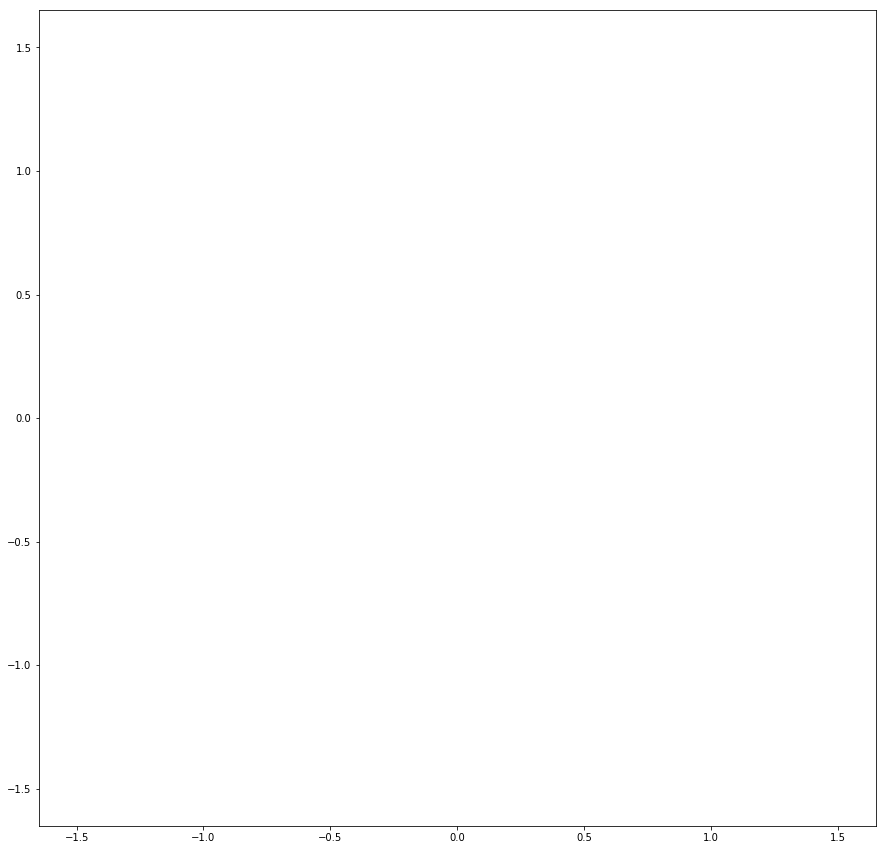

In [15]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes()
ax.set_xlim(-1.65, 1.65)
ax.set_ylim(-1.65, 1.65)

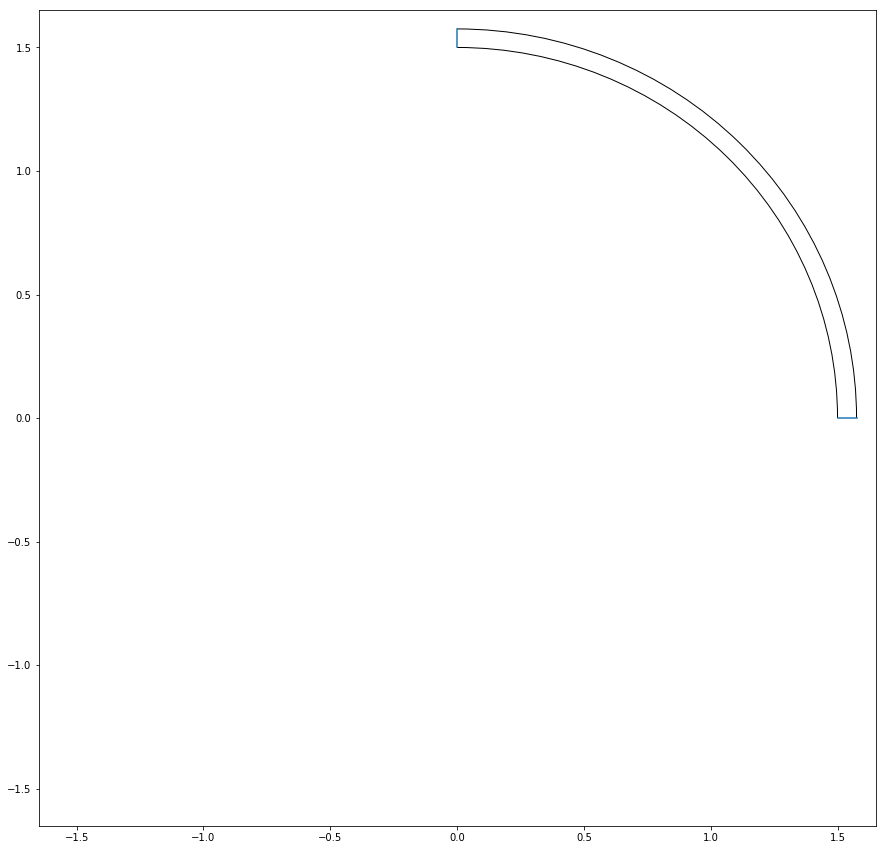

In [16]:
#Air far field
r1 = 1.5
r2 = r1*1.05

kpc = Point.ofCartesian(0.0, 0.0)
kp1 = Point.ofCartesian(r1, 0.0)
kp2 = Point.ofCartesian(0.0, r1)

kp1_far = Point.ofCartesian(r2, 0.0)
kp2_far = Point.ofCartesian(0.0, r2)

ln1_far = Line.ofEndPoints(kp1, kp1_far)
ln2_far = Arc.ofEndPointsCenter(kp1_far, kp2_far, kpc)
ln3_far = Line.ofEndPoints(kp2_far, kp2)
ln4_far = Arc.ofEndPointsCenter(kp1, kp2, kpc)

ar1_far = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln1_far, ln2_far, ln3_far, ln4_far)))
el1_far = Element("FAR_El1", ar1_far)

air_far_field = a.create_element_array(gateway, (el1_far))

p.plot_multiple_areas(ax, [ar1_far])
fig

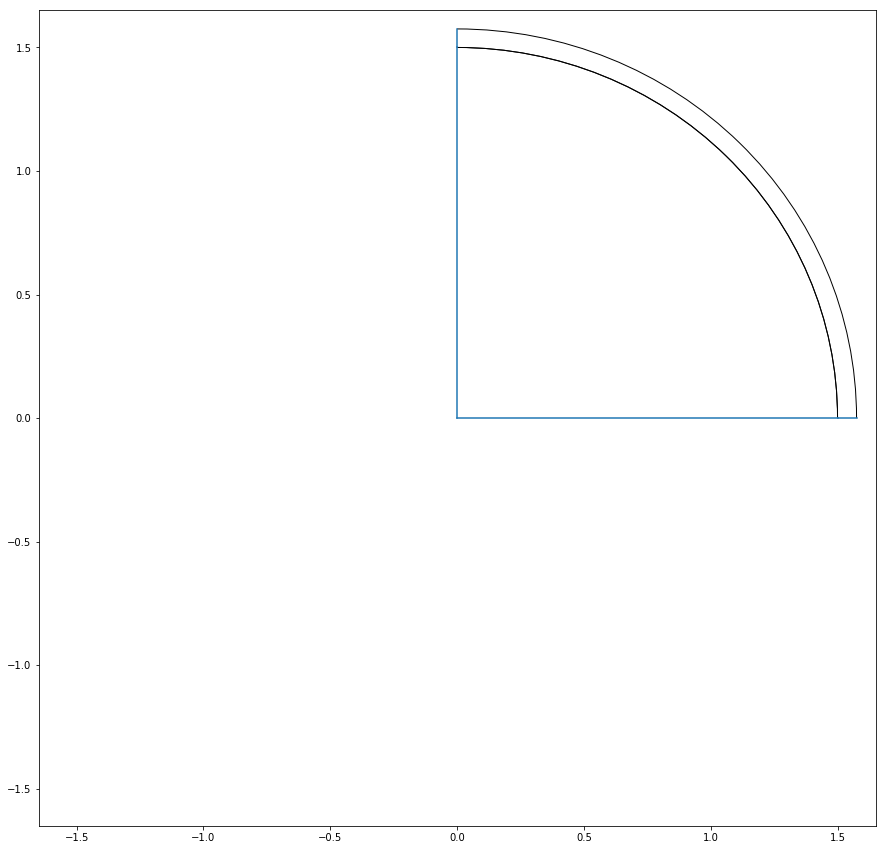

In [17]:
# Air domain
r = 1.5

kpc = Point.ofCartesian(0.0, 0.0)
kp1 = Point.ofCartesian(r, 0.0)
kp2 = Point.ofCartesian(0.0, r)

ln1 = Line.ofEndPoints(kpc, kp1)
ln2 = Arc.ofEndPointsCenter(kp1, kp2, kpc)
ln3 = Line.ofEndPoints(kp2, kpc)

ar1 = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln1, ln2, ln3)))

el1 = Element("AIR_El1", ar1)

air = a.create_element_array(gateway, (el1))

p.plot_multiple_areas(ax, [ar1])
fig

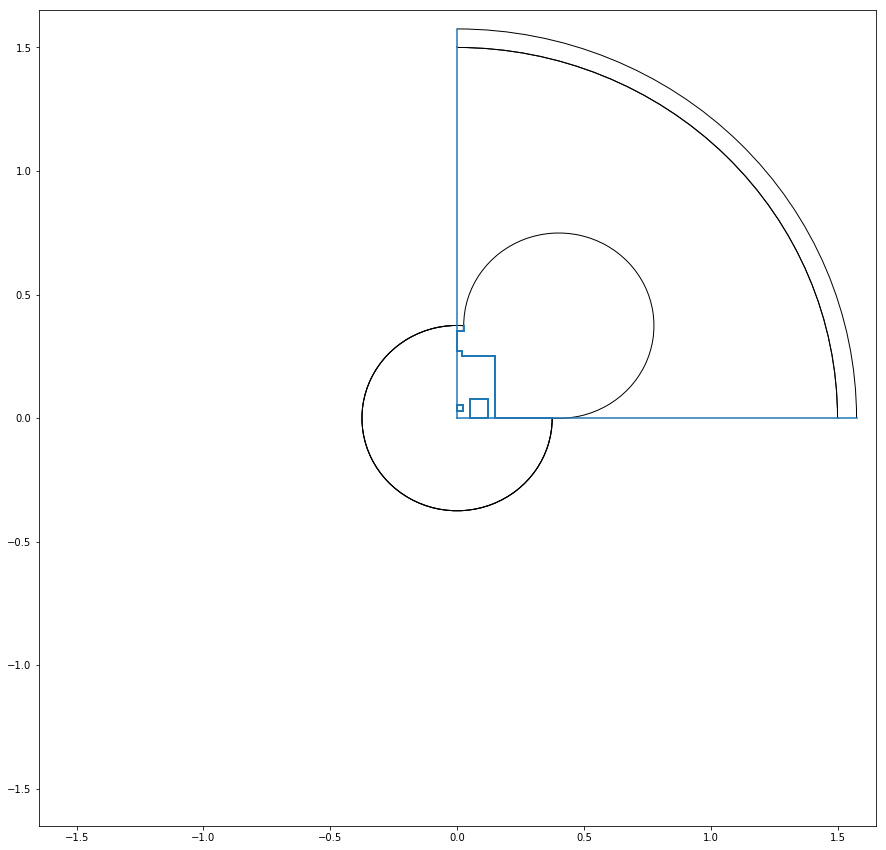

In [22]:
# iron yoke
mm = 1e-3
d2r = np.pi/180
rout = 375*mm
rhole = 15*mm
XCSUP = 20
xcsup = XCSUP*mm
YCSUP = 250
ycsup = YCSUP*mm
DYCSUP = 20
dycsup = DYCSUP*mm
XCMAX = 150
xcmax = XCMAX*mm
S1X = 51.6242
s1x = S1X*mm
S1Y = 0.4666
s1y = S1Y*mm
S1TX = 68.9352
s1tx = S1TX*mm
S1TY = 78.6876
s1ty = S1TY*mm
S2X = 0
s2x = S2X*mm
S2Y = 29.4948
s2y = S2Y*mm
S2TX = 24.4614
s2tx = S2TX*mm
S2TY = 24.7406
s2ty = S2TY*mm

kp1 = Point.ofCartesian(xcmax, 0.0)
kp2 = Point.ofCartesian(rout, 0.0)
kp3 = Point.ofPolar(rout, 86*d2r)
kp3a = Point.ofCartesian(26*mm, rout-22*mm)
kp3b = Point.ofCartesian(0.0, rout-22*mm)
kp4 = Point.ofCartesian(0.0, ycsup+dycsup)
kp4a = Point.ofCartesian(xcsup, ycsup+dycsup)
kp4b = Point.ofCartesian(xcsup, ycsup)
kp5 = Point.ofCartesian(xcmax, ycsup)
kps1 = Point.ofCartesian(s1x, s1y)
kps2 = Point.ofCartesian(s1x+s1tx, s1y)
kps3 = Point.ofCartesian(s1x+s1tx, s1y+s1ty)
kps4 = Point.ofCartesian(s1x, s1y+s1ty)
kps21 = Point.ofCartesian(s2x, s2y)
kps22 = Point.ofCartesian(s2x+s2tx, s2y)
kps23 = Point.ofCartesian(s2x+s2tx, s2y+s2ty)
kps24 = Point.ofCartesian(s2x, s2y+s2ty)

ln1 = Line.ofEndPoints(kp1, kp2)
ln2 = Arc.ofEndPointsRadius(kp3, kp2, rout)
ln3 = Line.ofEndPoints(kp3, kp3a)
ln3a = Line.ofEndPoints(kp3a, kp3b)
ln3b = Line.ofEndPoints(kp3b, kp4)
ln4 = Line.ofEndPoints(kp4, kp4a)
ln4a = Line.ofEndPoints(kp4a, kp4b)
ln4b = Line.ofEndPoints(kp4b, kp5)
ln5 = Line.ofEndPoints(kp5, kp1)

lns1 = Line.ofEndPoints(kps1, kps2)
lns2 = Line.ofEndPoints(kps2, kps3)
lns3 = Line.ofEndPoints(kps3, kps4)
lns4 = Line.ofEndPoints(kps4, kps1)

lns21 = Line.ofEndPoints(kps21, kps22)
lns22 = Line.ofEndPoints(kps22, kps23)
lns23 = Line.ofEndPoints(kps23, kps24)
lns24 = Line.ofEndPoints(kps24, kps21)

ar1 = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln1, ln2, ln3, ln3a, ln3b, ln4, ln4a, ln4b, ln5)))
ars1 = Area.ofHyperLines(a.create_hyper_line_array(gateway, (lns1, lns2, lns3, lns4)))
ars2 = Area.ofHyperLines(a.create_hyper_line_array(gateway, (lns21, lns22, lns23, lns24)))

el1 = Element("IY_El1", ar1)
els1 = Element("IY_Els1", ars1)
els2 = Element("IY_Els2", ars2)

iron_yoke = a.create_element_array(gateway, (el1, els1, els2))

p.plot_multiple_areas(ax, [ar1, ars1, ars2])
fig

In [29]:
# High-field cable parameters
wBare = 19.2e-3
dstrand = 1.2e-3
thetaTpStrand = 15*np.pi/180

cableHF = Cable()
cableHF.setLabel("cable_EUHF1")
cableHF.setwBare(19.2e-3)
cableHF.sethInBare(2.2e-3)
cableHF.sethOutBare(2.2e-3)
cableHF.setNoOfStrands(30)
cableHF.setNoOfStrandsPerLayer(15)
cableHF.setNoOfLayers(2)
cableHF.setwCore(0.0)
cableHF.sethCore(0.0)
cableHF.setDstrand(1.2e-3)
CuScRatio = 1
cableHF.setFracCu(1/(1+(1/CuScRatio)))
cableHF.setFracSc(1/(1+CuScRatio))
cableHF.setRRR(100.0)
cableHF.setTupRRR(295.0)
cableHF.setTop(1.9)
cableHF.setThetaTpStrand(15*np.pi/180)
cableHF.setlTpStrand(2*(wBare-dstrand)/math.tan(thetaTpStrand))
cableHF.setdFilament(30e-6)
cableHF.setwInsulNarrow(1.5e-4)
cableHF.setwInsulWide(1.5e-4)
cableHF.setRc(100e-6)
cableHF.setRa(100e-6)
cableHF.setfRhoEff(1.0)
cableHF.setlTp(14e-3)
cableHF.setC1(0.0)
cableHF.setC2(0.0)
cableHF.setFracHe(0.0)
cableHF.setFracFillInnerVoids(1.0)
cableHF.setFractFillOuterVoids(1.0)
cableHF.setCriticalSurfaceFit(Cable.CriticalSurfaceFitEnum.Ic_Nb3Sn_FCC)
cableHF.setInsulationMaterial(MatDatabase.MAT_GLASSFIBER)
cableHF.setMaterialInnerVoids(MatDatabase.MAT_GLASSFIBER)
cableHF.setMaterialOuterVoids(MatDatabase.MAT_GLASSFIBER)
cableHF.setMaterialCore(MatDatabase.MAT_VOID)
cableHF.setResitivityCopperFit(Cable.ResitivityCopperFitEnum.rho_Cu_NIST)

JavaObject id=o1705

In [24]:
# Low-field cable parameters
wBare = 12.6e-3
dstrand = 0.7e-3
thetaTpStrand = 15*np.pi/180

cableLF = Cable()
cableLF.setLabel("cable_EULF1")
cableLF.setwBare(12e-3)
cableLF.sethInBare(2.2e-3)
cableLF.sethOutBare(2.2e-3)
cableLF.setNoOfStrands(18)
cableLF.setNoOfStrandsPerLayer(9)
cableLF.setNoOfLayers(2)
cableLF.setwCore(0.0)
cableLF.sethCore(0.0)
cableLF.setDstrand(1.2e-3)
CuScRatio = 2.5
cableLF.setFracCu(1/(1+(1/CuScRatio)))
cableLF.setFracSc(1/(1+CuScRatio))
cableLF.setRRR(100.0)
cableLF.setTupRRR(295.0)
cableLF.setTop(1.9)
cableLF.setThetaTpStrand(15*np.pi/180)
cableLF.setlTpStrand(2*(wBare-dstrand)/math.tan(thetaTpStrand))
cableLF.setdFilament(30e-6)
cableLF.setwInsulNarrow(1.5e-4)
cableLF.setwInsulWide(1.5e-4)
cableLF.setRc(100e-6)
cableLF.setRa(100e-6)
cableLF.setfRhoEff(1.0)
cableLF.setlTp(14e-3)
cableLF.setC1(0.0)
cableLF.setC2(0.0)
cableLF.setFracHe(0.0)
cableLF.setFracFillInnerVoids(1.0)
cableLF.setFractFillOuterVoids(1.0)
cableLF.setCriticalSurfaceFit(Cable.CriticalSurfaceFitEnum.Ic_Nb3Sn_FCC)
cableLF.setInsulationMaterial(MatDatabase.MAT_GLASSFIBER)
cableLF.setMaterialInnerVoids(MatDatabase.MAT_GLASSFIBER)
cableLF.setMaterialOuterVoids(MatDatabase.MAT_GLASSFIBER)
cableLF.setMaterialCore(MatDatabase.MAT_VOID)
cableLF.setResitivityCopperFit(Cable.ResitivityCopperFitEnum.rho_Cu_NIST)

JavaObject id=o1201

## Coil

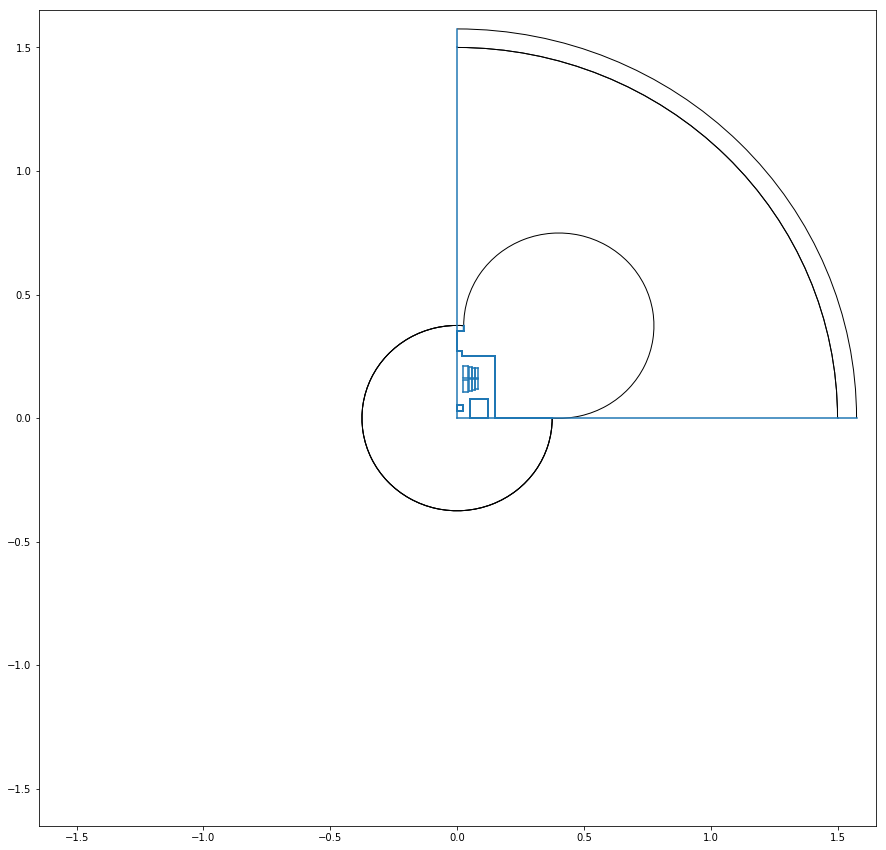

In [26]:
kp11 = Point.ofCartesian(25.15e-3, 155.95e-3)
kp12 = Point.ofCartesian(kp11.getX(), 106.25e-3)
kp13 = Point.ofCartesian(44.35e-3, kp12.getY())
kp14 = Point.ofCartesian(kp13.getX(), kp11.getY())

kp21 = Point.ofCartesian(25.15e-3, 210.357e-3)
kp22 = Point.ofCartesian(kp21.getX(), 163.157e-3)
kp23 = Point.ofCartesian(44.35e-3, kp22.getY())
kp24 = Point.ofCartesian(kp23.getX(), kp21.getY())

kp31 = Point.ofCartesian(45.15e-3, 157.2964e-3) 
kp32 = Point.ofCartesian(kp31.getX(), 110.0964e-3)
kp33 = Point.ofCartesian(57.15e-3, kp32.getY())
kp34 = Point.ofCartesian(kp33.getX(), kp31.getY())

kp41 = Point.ofCartesian(45.15e-3, 207.884e-3) 
kp42 = Point.ofCartesian(kp41.getX(), 163.184e-3)
kp43 = Point.ofCartesian(57.15e-3, kp42.getY())
kp44 = Point.ofCartesian(kp43.getX(), kp41.getY())

kp51 = Point.ofCartesian(57.95e-3, 158.1091e-3) 
kp52 = Point.ofCartesian(kp51.getX(), 113.4091e-3)
kp53 = Point.ofCartesian(69.95e-3, kp52.getY())
kp54 = Point.ofCartesian(kp53.getX(), kp51.getY())

kp61 = Point.ofCartesian(57.95e-3, 204.322e-3) 
kp62 = Point.ofCartesian(kp61.getX(), 162.122e-3)
kp63 = Point.ofCartesian(69.95e-3, kp62.getY())
kp64 = Point.ofCartesian(kp63.getX(), kp61.getY())

kp71 = Point.ofCartesian(70.75e-3, 158.5317e-3) 
kp72 = Point.ofCartesian(kp71.getX(), 116.3317e-3)
kp73 = Point.ofCartesian(82.75e-3, kp72.getY())
kp74 = Point.ofCartesian(kp73.getX(), kp71.getY())

kp81 = Point.ofCartesian(70.75e-3, 201.192e-3) 
kp82 = Point.ofCartesian(kp81.getX(), 161.492e-3)
kp83 = Point.ofCartesian(82.75e-3, kp82.getY())
kp84 = Point.ofCartesian(kp83.getX(), kp81.getY())

kp91 = Point.ofCartesian(13.65e-3, 115.65e-3) 
kp92 = Point.ofCartesian(18.35e-3, kp91.getY())
kp93 = Point.ofCartesian(kp92.getX(), 134.85e-3)
kp94 = Point.ofCartesian(kp91.getX(), kp93.getY())

kp101 = Point.ofCartesian(13.65e-3, 185.15e-3) 
kp102 = Point.ofCartesian(18.35e-3, kp101.getY())
kp103 = Point.ofCartesian(kp102.getX(), 204.35e-3)
kp104 = Point.ofCartesian(kp101.getX(), kp103.getY())

kp111 = Point.ofCartesian(19.15e-3, 119.15e-3)
kp112 = Point.ofCartesian(23.85e-3, kp111.getY()) 
kp113 = Point.ofCartesian(kp112.getX(), 138.35e-3)
kp114 = Point.ofCartesian(kp111.getX(), kp113.getY())

kp121 = Point.ofCartesian(19.15e-3, 181.65e-3) 
kp122 = Point.ofCartesian(23.85e-3, kp121.getY())
kp123 = Point.ofCartesian(kp122.getX(), 200.85e-3)
kp124 = Point.ofCartesian(kp121.getX(), kp123.getY())

kp131 = Point.ofCartesian(13.65e-3, 95.0745e-3) 
kp132 = Point.ofCartesian(18.35e-3, kp131.getY())
kp133 = Point.ofCartesian(kp132.getX(), 114.2745e-3)
kp134 = Point.ofCartesian(kp131.getX(), kp133.getY())

kp141 = Point.ofCartesian(13.65e-3, 205.671e-3) 
kp142 = Point.ofCartesian(18.35e-3, kp141.getY())
kp143 = Point.ofCartesian(kp142.getX(), 224.871e-3)
kp144 = Point.ofCartesian(kp141.getX(), kp143.getY())

kp151 = Point.ofCartesian(19.15e-3, 99.1445e-3) 
kp152 = Point.ofCartesian(23.85e-3, kp151.getY())
kp153 = Point.ofCartesian(kp152.getX(), 118.3445e-3)
kp154 = Point.ofCartesian(kp151.getX(), kp153.getY())

kp161 = Point.ofCartesian(19.15e-3, 201.67e-3) 
kp162 = Point.ofCartesian(23.85e-3, kp161.getY())
kp163 = Point.ofCartesian(kp162.getX(), 220.87e-3)
kp164 = Point.ofCartesian(kp161.getX(), kp163.getY())

ln11 = Line.ofEndPoints(kp12, kp11)
ln12 = Line.ofEndPoints(kp12, kp13)
ln13 = Line.ofEndPoints(kp13, kp14)
ln14 = Line.ofEndPoints(kp11, kp14)

ln21 = Line.ofEndPoints(kp22, kp21)
ln22 = Line.ofEndPoints(kp22, kp23)
ln23 = Line.ofEndPoints(kp23, kp24)
ln24 = Line.ofEndPoints(kp21, kp24)

ln31 = Line.ofEndPoints(kp32, kp31)
ln32 = Line.ofEndPoints(kp32, kp33)
ln33 = Line.ofEndPoints(kp33, kp34)
ln34 = Line.ofEndPoints(kp31, kp34)

ln41 = Line.ofEndPoints(kp42, kp41)
ln42 = Line.ofEndPoints(kp42, kp43)
ln43 = Line.ofEndPoints(kp43, kp44)
ln44 = Line.ofEndPoints(kp41, kp44)

ln51 = Line.ofEndPoints(kp52, kp51)
ln52 = Line.ofEndPoints(kp52, kp53)
ln53 = Line.ofEndPoints(kp53, kp54)
ln54 = Line.ofEndPoints(kp51, kp54)

ln61 = Line.ofEndPoints(kp62, kp61)
ln62 = Line.ofEndPoints(kp62, kp63)
ln63 = Line.ofEndPoints(kp63, kp64)
ln64 = Line.ofEndPoints(kp61, kp64)

ln71 = Line.ofEndPoints(kp72, kp71)
ln72 = Line.ofEndPoints(kp72, kp73)
ln73 = Line.ofEndPoints(kp73, kp74)
ln74 = Line.ofEndPoints(kp71, kp74)

ln81 = Line.ofEndPoints(kp82, kp81)
ln82 = Line.ofEndPoints(kp82, kp83)
ln83 = Line.ofEndPoints(kp83, kp84)
ln84 = Line.ofEndPoints(kp81, kp84)

ln91 = Line.ofEndPoints(kp92, kp91)
ln92 = Line.ofEndPoints(kp92, kp93)
ln93 = Line.ofEndPoints(kp93, kp94)
ln94 = Line.ofEndPoints(kp91, kp94)

ln101 = Line.ofEndPoints(kp102, kp101)
ln102 = Line.ofEndPoints(kp102, kp103)
ln103 = Line.ofEndPoints(kp103, kp104)
ln104 = Line.ofEndPoints(kp101, kp104)

ln111 = Line.ofEndPoints(kp112, kp111)
ln112 = Line.ofEndPoints(kp112, kp113)
ln113 = Line.ofEndPoints(kp113, kp114)
ln114 = Line.ofEndPoints(kp111, kp114)

ln121 = Line.ofEndPoints(kp122, kp121)
ln122 = Line.ofEndPoints(kp122, kp123)
ln123 = Line.ofEndPoints(kp123, kp124)
ln124 = Line.ofEndPoints(kp121, kp124)

ln131 = Line.ofEndPoints(kp132, kp131)
ln132 = Line.ofEndPoints(kp132, kp133)
ln133 = Line.ofEndPoints(kp133, kp134)
ln134 = Line.ofEndPoints(kp131, kp134)

ln141 = Line.ofEndPoints(kp142, kp141)
ln142 = Line.ofEndPoints(kp142, kp143)
ln143 = Line.ofEndPoints(kp143, kp144)
ln144 = Line.ofEndPoints(kp141, kp144)

ln151 = Line.ofEndPoints(kp152, kp151)
ln152 = Line.ofEndPoints(kp152, kp153)
ln153 = Line.ofEndPoints(kp153, kp154)
ln154 = Line.ofEndPoints(kp151, kp154)

ln161 = Line.ofEndPoints(kp162, kp161)
ln162 = Line.ofEndPoints(kp162, kp163)
ln163 = Line.ofEndPoints(kp163, kp164)
ln164 = Line.ofEndPoints(kp161, kp164)

ha11p = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln11, ln12, ln13, ln14)))
ha12p = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln21, ln22, ln23, ln24)))
ha13p = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln31, ln32, ln33, ln34)))
ha14p = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln41, ln42, ln43, ln44)))
ha15p = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln51, ln52, ln53, ln54)))
ha16p = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln61, ln62, ln63, ln64)))
ha17p = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln71, ln72, ln73, ln74)))
ha18p = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln81, ln82, ln83, ln84)))
ha19p = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln91, ln92, ln93, ln94)))
ha110p = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln101, ln102, ln103, ln104)))
ha111p = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln111, ln112, ln113, ln114)))
ha112p = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln121, ln122, ln123, ln124)))
ha113p = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln131, ln132, ln133, ln134)))
ha114p = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln141, ln142, ln143, ln144)))
ha115p = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln151, ln152, ln153, ln154)))
ha116p = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln161, ln162, ln163, ln164)))

w11 = Winding.ofAreas(a.create_area_array(gateway, (ha11p)), a.create_int_array(gateway, (+1)), 20, 20, cableHF)
w12 = Winding.ofAreas(a.create_area_array(gateway, (ha12p)), a.create_int_array(gateway, (+1)), 19, 19, cableHF)
w13 = Winding.ofAreas(a.create_area_array(gateway, (ha13p)), a.create_int_array(gateway, (+1)), 19, 19, cableLF)
w14 = Winding.ofAreas(a.create_area_array(gateway, (ha14p)), a.create_int_array(gateway, (+1)), 18, 18, cableLF)
w15 = Winding.ofAreas(a.create_area_array(gateway, (ha15p)), a.create_int_array(gateway, (+1)), 18, 18, cableLF)
w16 = Winding.ofAreas(a.create_area_array(gateway, (ha16p)), a.create_int_array(gateway, (+1)), 17, 17, cableLF)
w17 = Winding.ofAreas(a.create_area_array(gateway, (ha17p)), a.create_int_array(gateway, (+1)), 17, 17, cableLF)
w18 = Winding.ofAreas(a.create_area_array(gateway, (ha18p)), a.create_int_array(gateway, (+1)), 16, 16, cableLF)
w19 = Winding.ofAreas(a.create_area_array(gateway, (ha19p)), a.create_int_array(gateway, (+1)), 2, 2, cableHF)
w110 = Winding.ofAreas(a.create_area_array(gateway, (ha110p)), a.create_int_array(gateway, (+1)), 2, 2, cableHF)
w111 = Winding.ofAreas(a.create_area_array(gateway, (ha111p)), a.create_int_array(gateway, (+1)), 2, 2, cableHF)
w112 = Winding.ofAreas(a.create_area_array(gateway, (ha112p)), a.create_int_array(gateway, (+1)), 2, 2, cableHF)
w113 = Winding.ofAreas(a.create_area_array(gateway, (ha113p)), a.create_int_array(gateway, (+1)), 2, 2, cableHF)
w114 = Winding.ofAreas(a.create_area_array(gateway, (ha114p)), a.create_int_array(gateway, (+1)), 2, 2, cableHF)
w115 = Winding.ofAreas(a.create_area_array(gateway, (ha115p)), a.create_int_array(gateway, (+1)), 2, 2, cableHF)
w116 = Winding.ofAreas(a.create_area_array(gateway, (ha116p)), a.create_int_array(gateway, (+1)), 2, 2, cableHF)
 
w13 = w13.reverseWindingDirection()
w14 = w14.reverseWindingDirection()
w17 = w17.reverseWindingDirection()
w18 = w18.reverseWindingDirection()
w19 = w19.reverseWindingDirection()
w111 = w111.reverseWindingDirection()
w114 = w114.reverseWindingDirection()
w116 = w116.reverseWindingDirection()

poles = Pole.ofWindings(a.create_winding_array(gateway, (w18, w17, w15, w16, w14, w13, w11, w12, w115, w113, w19, w111, w112, w110, w114, w116)))

coil = Coil.ofPoles(a.create_pole_array(gateway, (poles)))

p.plot_multiple_areas(ax, [ha11p, ha12p, ha13p, ha14p, 
                         ha15p, ha16p, ha17p, ha18p])
fig

In [11]:
# Assemble domains together
domains = a.create_domain_array(gateway, (AirDomain("airDomain", MatDatabase.MAT_AIR, air),
                AirFarFieldDomain("airFarFieldDomain", MatDatabase.MAT_AIR, air_far_field),
                CoilDomain("coil", MatDatabase.MAT_COIL, coil),
                IronDomain("ironYoke", MatDatabase.MAT_IRON1, iron_yoke))

In [12]:
# Create magnet model
cfg = ConfigSigma()
cfg.setOutputModelPath("MagnetModel.java")
cfg.setExternalCFunLibPath("U:\\STEAM\\MaterialsLibrary")

srv = TxtSigmaServer(cfg.getOutputModelPath(), cfg.getComsolBatchPath())
srv.connect(cfg.getComsolBatchPath())
m = MagnetMPHBuilder(cfg, srv)
m.buildMPH(domains)
m.save()

# Steps for the STEAM-SIGMA documentation to complete a model
<img src="../SolverSettings.PNG">
<img src="../PhysicsSettings.PNG">

# Magnetic field distribution


# Extract differential inductance as a function of current

# Calculate differential inductance matrix

# Create equivalent electrical network with STEAM - preconditioner

# Create circuit to be coupled to